## Linear Regression 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [3]:
data = get_data(data_path="motorbike_ambulance_calls.csv")
data.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
data.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [5]:
data.min()

index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp              0
hum                0
windspeed          0
cnt                1
dtype: object

In [6]:
data.max()

index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp               1
atemp              1
hum                1
windspeed     0.8507
cnt              977
dtype: object

In [7]:
data.shape

(17379, 15)

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [8]:
data.dtypes

index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [9]:
data.count()

index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64

**Завдання 3** перевірте всі змінні на наявність пропусків.

In [10]:
data.isna().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1. за допомогою `describe` побачили основні статистичні дані по числових змінних, також дізнались кількість рядків за допомогою `shape`
2. перевірили типи даних в датасеті
3. переконались, що датасет не містить пропусків



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [11]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
data = tranform_date(data, 'date')


In [12]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")
get_time_limits(data, "date")

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


In [13]:
#your conclusions
data.dtypes

index                  int64
date          datetime64[ns]
season                object
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

### Висновки

Для зручності роботи з датою, ми перетворили стрічку в `datetime`, також виявили перший та останній день в датасеті, з чого робимо висновок що датасет містить дані за 2 роки

# Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [14]:
data_categorical = data[['season', 'yr', 'mnth','hr', 'holiday', 'weekday','workingday','weathersit']]
data_categorical.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,spring,0,1,0,0,6,0,1
1,spring,0,1,1,0,6,0,1
2,spring,0,1,2,0,6,0,1
3,spring,0,1,3,0,6,0,1
4,spring,0,1,4,0,6,0,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [15]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = df[season_col_name].factorize()[0]
  return df
  
data = encode_season(data, 'season')
data.season.value_counts()

2    4496
1    4409
0    4242
3    4232
Name: season, dtype: int64

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

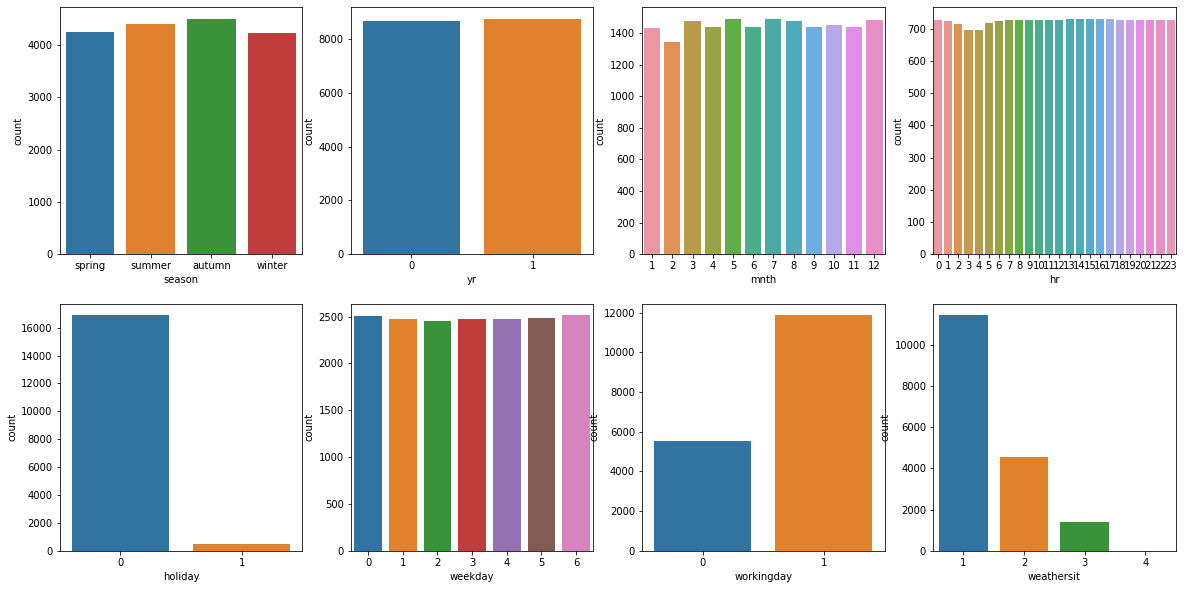

In [16]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
    sns.countplot(x=data_categorical[variable], ax=subplot)

In [17]:
data[data['weathersit'] == 4]

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
585,586,2011-01-26,0,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,36
8854,8855,2012-01-09,0,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,164
9123,9124,2012-01-21,0,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,23


**Висновки з 5-7 завдання (детальні)**



1. згідно з характеристики вибірки, можна зробити висновки що змінні `season` `yr`, `mnth`, `hr`, `weekday`, `workingday` та `weathersit` є категоріальними 
2. за допомогою методу `factorize` треба перетворити категоріальну змінну в числове представлення
3. дивлячись на графіки по категоріальним змінним, можна сказати що дані, в переважній більшості, мають рівномірний розподіл, або розподіл близький до нього. Суттєво відрізняються дані у `workingday` та `weathersit`. Більшість аварій виникали в робочі дні та в сонячну погоду, та майже повна відсутність викликів під час поганих погодних умов



# Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [18]:
data_numerical = data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

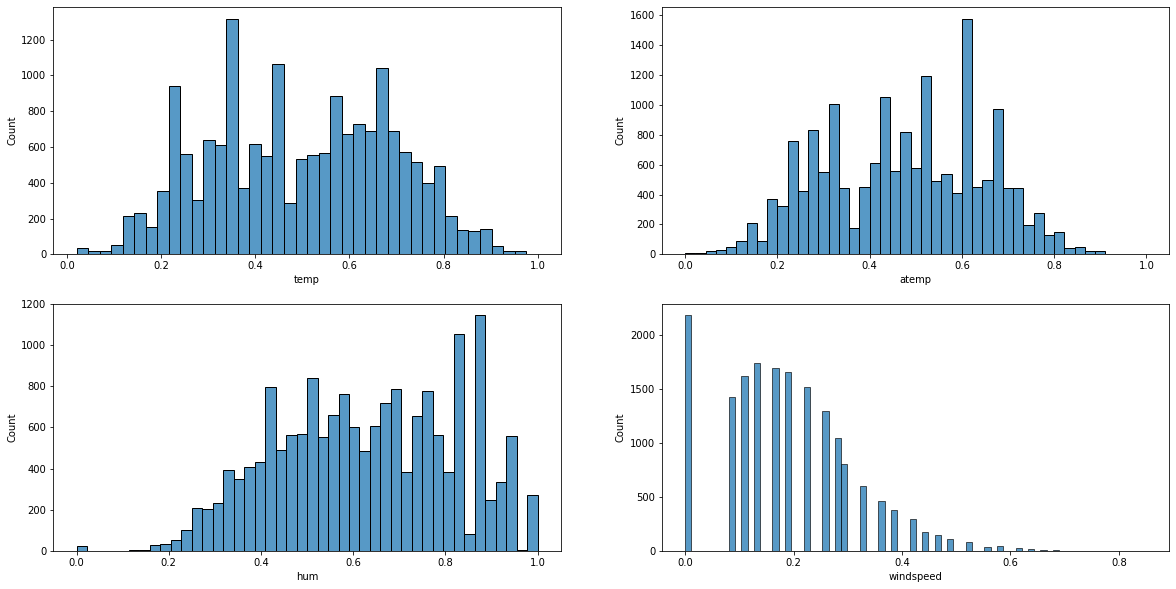

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
    sns.histplot(x=data_numerical[variable], ax=subplot)


In [20]:
data_numerical.skew()

temp        -0.006021
atemp       -0.090429
hum         -0.111287
windspeed    0.574905
cnt          1.277412
dtype: float64

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

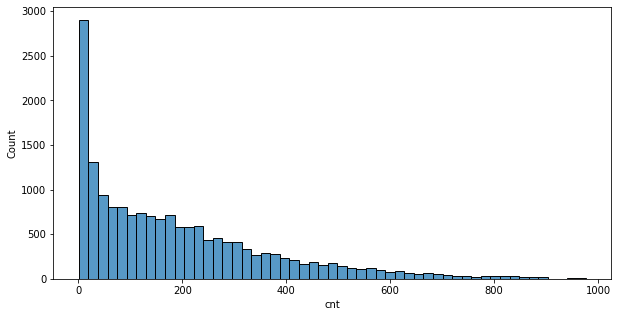

Skew = 1.2774116037490577


In [21]:
fig, ax = plt.subplots(1, figsize=(10, 5))
sns.histplot(x=data['cnt'], ax=ax)
plt.show()
print('Skew =', data['cnt'].skew())

**Висновки з 8-10 завдання (детальні)**



1. виділяємо всі інші змінні крім категоріальних та індексу як числові
2. побудувавши графіки можна припустити що змінна `temp` має розподіл близький до нормального, але є завал справа, та прогин по середині, який може вказати на бімодальний розподіл. `hum` має важкий лівий хвіст, який в подальшому розгляді можна відрізати. `windspeed` має скошений розподіл та важкий правий хвіст, який теж можна відкинути.
3. цільова змінна має великий коефіціент скошеності



# Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

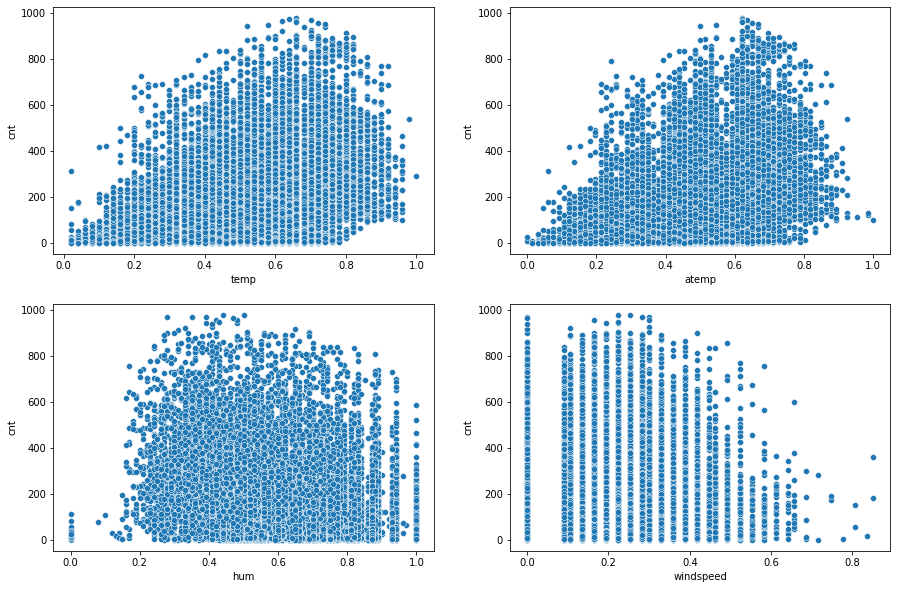

In [22]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(data=data_numerical, x=var, y='cnt', ax=subplot)

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

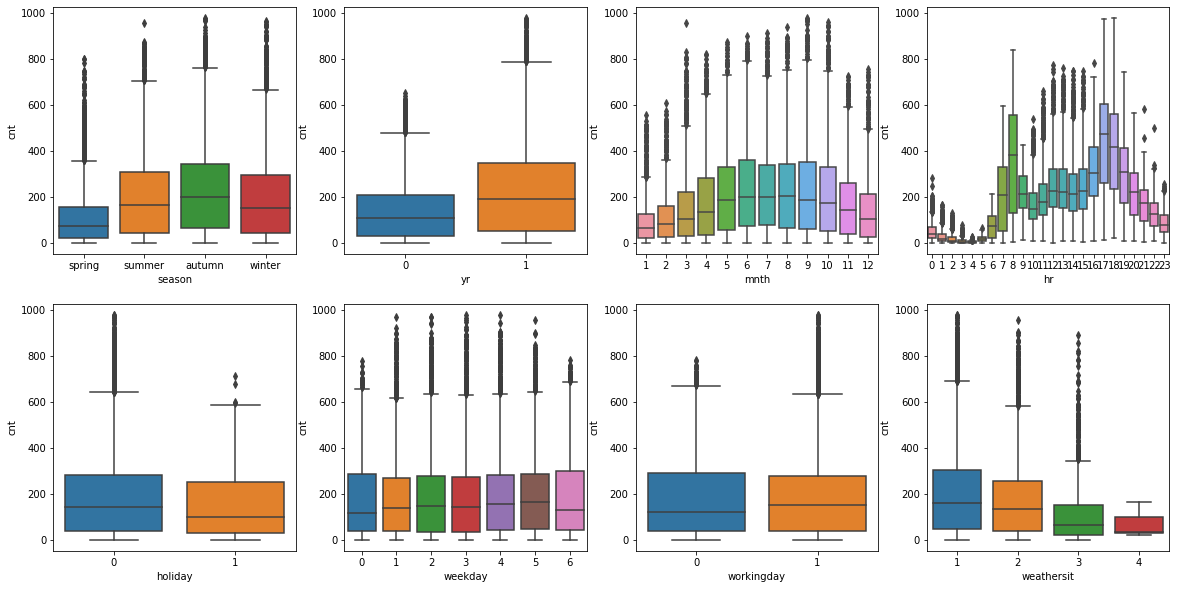

In [23]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x=data_categorical[var], y=data['cnt'], ax=subplot)

**Висновки з 11-12 завдання (детальні)**



1. Зображення залежностей на `scatterplot` дає зможу спостерігати кореляцію між змінним   
2. з боксплотів можна помітити, що в змінній `hr` дані розподілено бімодально. також, помітно як змінюється кількість в залежності від пори року.
3. Розглядаючи графік залежності категоріальних змінних від цільової, можемо виділити найпопулярніші часові періоди: від 7 до 9, та від 16 до 19 години.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

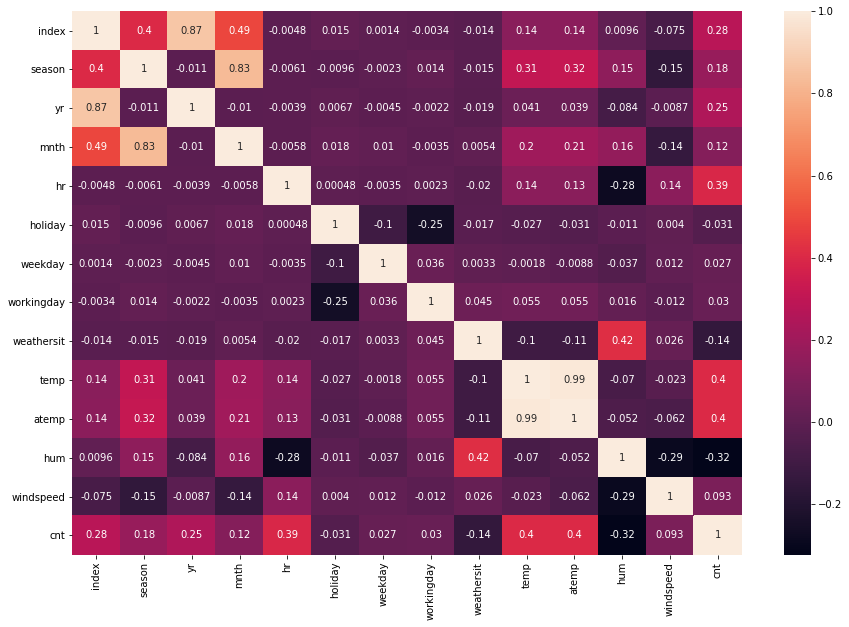

In [24]:
fig, ax = plt.subplots(1, figsize=(15, 10))
corrcoef = data.corr(method='pearson')
sns.heatmap(corrcoef, annot=True)
plt.show()

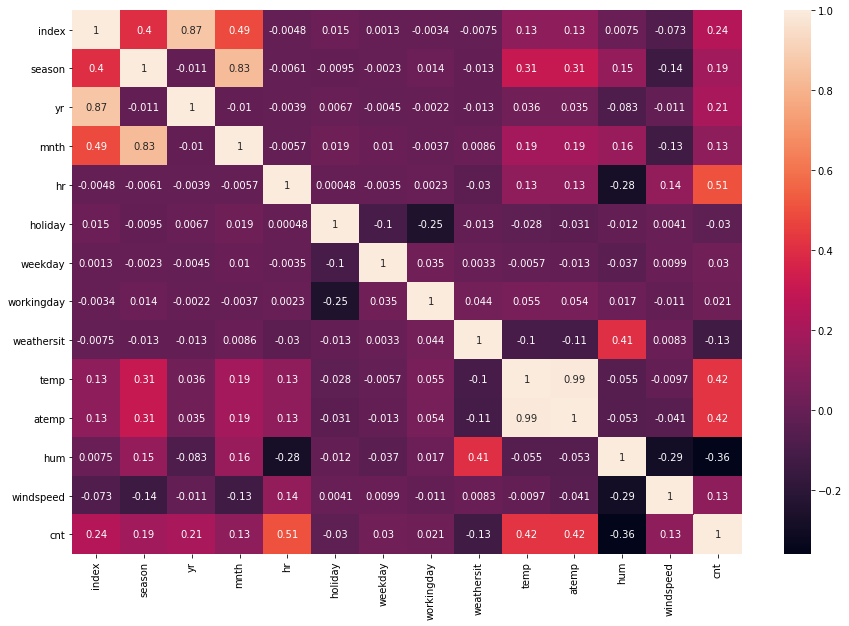

In [25]:
fig, ax = plt.subplots(1, figsize=(15, 10))
corrcoef = data.corr(method='spearman')
sns.heatmap(corrcoef, annot=True)
plt.show()

### your conclusions 

- з матриць кореляції помітно дуже високу залежність між змінними `temp` `atemp`, адже вони переважно дублюються, тому можемо видалити одну з них. Також, помітна деяка залежність кількості викликів від години, що видно на попередніх `boxplot`

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [26]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                        pd.get_dummies(df['season'], prefix='season'),
#                         pd.get_dummies(df['yr'], prefix='yr'),
                        pd.get_dummies(df['mnth'], prefix='mnth'),
                        pd.get_dummies(df['hr'], prefix='hr'),
#                         pd.get_dummies(df['holiday'], prefix='holiday'),
                        pd.get_dummies(df['weekday'], prefix='weekday'),
#                         pd.get_dummies(df['workingday'], prefix='workingday'),
                        pd.get_dummies(df['weathersit'], prefix='weathersit')
                        ], axis = 1
                        )
    features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
    return features

In [27]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [28]:
features['night_hours'] = [0 if x in range(4,20) else 1 for x in data['hr']] # 1-night, 0-day
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії**


[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [29]:
features_lr = features.drop(['season_0', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date', 'index'], axis = 1)
features_lr

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4,night_hours
0,0,0,0,0.24,0.81,0.0000,16,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0.22,0.80,0.0000,40,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0.22,0.80,0.0000,32,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0.24,0.75,0.0000,13,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0.24,0.75,0.0000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.60,0.1642,119,0,0,0,...,1,0,0,0,0,0,1,0,0,0
17375,1,0,1,0.26,0.60,0.1642,89,0,0,0,...,1,0,0,0,0,0,1,0,0,1
17376,1,0,1,0.26,0.60,0.1642,90,0,0,0,...,1,0,0,0,0,0,0,0,0,1
17377,1,0,1,0.26,0.56,0.1343,61,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [30]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
    return X_train, X_test, y_train, y_test

In [31]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [32]:
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)

In [33]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10474.227, test: 10127.091
R^2 train: 0.687, test: 0.679


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

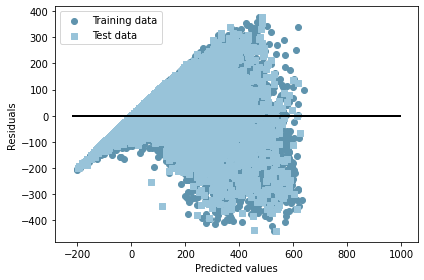

In [34]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1. для всіх категоріальних змінних було створено фіктивні змінні, крім `yr` `holiday` `workingday`, адже вони є бінарними
2. замість змінної числової змінної `hr` було стоврено категоріальну `night_hours`, яка містить 1 якщо виклик був в діапазоні між 20 та 4 годиною
3. видаляємо всі зайві атрибути - `index` не потрібен, `atime` - майже повністю повторюється з `time`, `date` - не має для нас ніякої цінності.
4. розділяємо датасет на `train` і `test`, після чого тренуємо модель та перевіряємо результат
